# Instruction to run the code


To run this notebook, we will need the following package installed:

```shell
pip install geopandas
pip install pandas
pip install zipfile
pip install keplergl
pip install math
pip install networkx
pip install matplotlib
```

In [13]:
from TransNet import BEB_bus_network
from PowerNet import virtual_power_network
from GTFS_TransPowerNet import *

# Step 1: Input parameters for the coupled network

> Required parameters for the transportation network:
> 1. Traveling threshold: The maximum acceptable distance for selecting transportation nodes (unit: feet).
> 2. Minimum number of routes: The minimum number of routes that a common stop should serve.


> Required parameters for the power network:
> 1. Distance threshold: The maximum acceptable distance for selecting power nodes (unit: km).


In [2]:
# set up a traveling threshold for selecting the candidate charging stations along the routes (unit: feet)
dist_threshold = 40000
# define a common stop as the one that appears in more than 3 routes
common_stop_threshold = 3
# set a threshold for the distance between the candidate charging stations in the power network (unit: km)
threshold_power_node = 2

# Step 2: Input the GTFS files and BEB route list string

> Example GTFS files:
> Here we provide three examples of GTFS files from different locations:
> 1. King County, WA.
> 2. Austin, TX.
> 3. Salt Lake City, UT.

> Selecting BEB routes:
> From each GTFS file, a subset of bus routes will be randomly chosen as Battery Electric Bus (BEB) routes.
> These routes will be utilized for building the coupled power and transportation network.


In [3]:
# Example 1: King County Metro bus routes (https://metro.kingcounty.gov/GTFS/)
WA_gtfs_file = "king_county_gtfs.zip"
# create a list of routes that are BEB routes
WA_BEB_route = ["22", "101", "102", "111", "116", "143", "150", "153", "154", "156", "157", "158", "159", "168", "169",
"177", "178", "179", "180", "181", "182", "183", "186", "187", "190", "192", "193", "197"]

# Example 2: Austin transit bus routes (https://data.austintexas.gov/widgets/r4v4-vz24)
TX_gtfs_file = "austin_gtfs.zip"
TX_BEB_route = ["103", "152", "201", "214", "271", "310", "315", "323", "484", "550", "656"]

# Example 3: Utah bus routes (https://transitfeeds.com/p/utah-transportation-authority/59)
UT_gtfs_file = "uta_gtfs.zip"
UT_BEB_route = ["17", "2", "21", "33", "35", "45", "47", "509", "513", "551", "701"]

# Step 3: Select transportation nodes and create the transportation network
> The function "BEB_bus_network" takes the following inputs: GTFS file, BEB route string list, traveling threshold, and minimum number of routes.

> Upon successful execution, the function will provide the following outputs:
> 1. A dataframe that records the selected transportation nodes, including stop_id, stop_lon, and stop_lat.
> 2. A dataframe that records the line segments forming the links in the transportation network.
> 3. A Kepler map showcasing the generated transportation network.
>
> Furthermore, after successful execution, the function will save the aforementioned dataframes as two geojson files in the current folder, facilitating future GIS analysis. Similarly, the map will be saved in the same folder for easy access and reference.

## Example 1: Generated Transportation Network of King County

In [4]:
# obtain the list of selected stops that are in the transporation network:
WA_candidate_stops_df, WA_shape_routes_df, WA_map_1 = BEB_bus_network(WA_gtfs_file, WA_BEB_route, dist_threshold, common_stop_threshold)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to trans_map.html!


## Example 2: Generated Transportation Network of Austin

In [5]:
TX_candidate_stops_df, TX_shape_routes_df, TX_map_1 = BEB_bus_network(TX_gtfs_file, TX_BEB_route, dist_threshold, common_stop_threshold)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to trans_map.html!


## Example 3: Generated Transportation Network of Salt Lake City

In [6]:
UT_candidate_stops_df, UT_shape_routes_df, UT_map_1 = BEB_bus_network(UT_gtfs_file, UT_BEB_route, dist_threshold, common_stop_threshold)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


/Users/zhaoxinyi/Downloads/coupleNetwork/source_code/TransNet.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape_routes['route_id'] = ''
/Users/zhaoxinyi/Downloads/coupleNetwork/source_code/TransNet.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape_routes['route_short_name'] = ''
/Users/zhaoxinyi/Downloads/coupleNetwork/source_code/TransNet.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

Map saved to trans_map.html!


# Step 4: Select power nodes and establish the power network
> The function "virtual_power_network" requires the following inputs: a dataframe containing the selected transportation nodes and a distance threshold.

> Upon successful execution, the function will generate the following outputs:
> 1. A dataframe that documents the chosen power nodes.
> 2. A dataframe that captures the connections within the power network.
> 3. A Kepler map displaying the created virtual power network.
>
> Furthermore, upon successful execution of the function, the power network will be graphically represented and plotted. Additionally, the map will be saved in the current folder for future reference.

## Example 1: Generated Power Network of King County

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


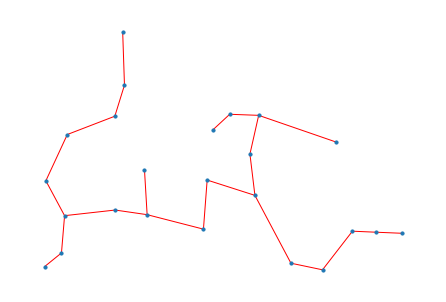

Map saved to grid_map.html!


In [7]:
# obtain the virtual power network:
WA_selected_power_nodes, WA_power_line_list, WA_map_2 = virtual_power_network(WA_candidate_stops_df, threshold_power_node)

## Example 2: Generated Power Network of Austin

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


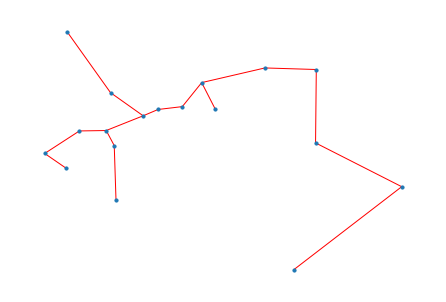

Map saved to grid_map.html!


In [8]:
TX_selected_power_nodes, TX_power_line_list, TX_map_2 = virtual_power_network(TX_candidate_stops_df, threshold_power_node)

## Example 3: Generated Power Network of Salt Lake City

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


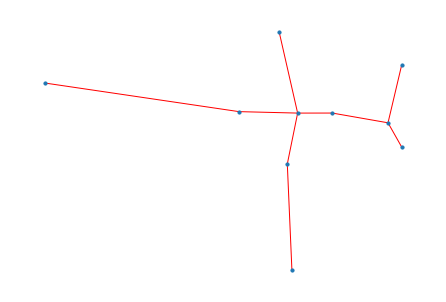

Map saved to grid_map.html!


In [9]:
UT_selected_power_nodes, UT_power_line_list, UT_map_2 = virtual_power_network(UT_candidate_stops_df, threshold_power_node)

# Step 5: Visualize the coupled power and transportation network

> In this step, we will combine the map of the generated transportation network and the virtual power network into a single visual representation. By overlapping these two networks on one map, we can gain a comprehensive view of the coupled network in the BEB planning projects.

## Example 1: Coupled Network of King County

In [10]:
# create a map to show the coupled power and transportation networks:
WA_map_3 = WA_map_1
WA_map_3.add_data(data = WA_selected_power_nodes, name='powernodes')
WA_map_3.add_data(data = WA_power_line_list, name='powerlines')
WA_map_3

KeplerGl(data={'candidates': {'index': [10, 105, 109, 180, 252, 265, 711, 879, 1071, 1474, 1540, 1650, 1750, 1…

## Example 2: Coupled Network of Austin

In [11]:
TX_map_3 = TX_map_1
TX_map_3.add_data(data = TX_selected_power_nodes, name='powernodes')
TX_map_3.add_data(data = TX_power_line_list, name='powerlines')
TX_map_3

KeplerGl(data={'candidates': {'index': [105, 146, 575, 706, 766, 786, 1090, 1165, 1214, 1425, 1454, 1475, 1494…

## Example 3: Coupled Network of Salt Lake City

In [12]:
UT_map_3 = UT_map_1
UT_map_3.add_data(data = UT_selected_power_nodes, name='powernodes')
UT_map_3.add_data(data = UT_power_line_list, name='powerlines')
UT_map_3

KeplerGl(data={'candidates': {'index': [4, 99, 1667, 1827, 3109, 3133, 3155, 3156, 3157, 3620, 3877, 3903, 391…